In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

In [2]:
files = glob('../data/eSports_Earning/*')

In [3]:
files

['../data/eSports_Earning\\country-and-continent-codes-list.csv',
 '../data/eSports_Earning\\GeneralEsportData.csv',
 '../data/eSports_Earning\\highest_earning_players.csv',
 '../data/eSports_Earning\\highest_earning_teams.csv',
 '../data/eSports_Earning\\HistoricalEsportData.csv']

In [4]:
teams = pd.read_csv(files[3])
players = pd.read_csv(files[2])
codes = pd.read_csv(files[0])

In [5]:
players.head(10)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter
7,12169,Fernando,Alvarenga,fer,br,1063038.92,Counter-Strike: Global Offensive,First-Person Shooter
8,2455,Gabriel,Toledo,FalleN,br,1059938.92,Counter-Strike: Global Offensive,First-Person Shooter
9,12182,Marcelo,David,coldzera,br,1021901.46,Counter-Strike: Global Offensive,First-Person Shooter


In [6]:
players['Game'].value_counts()

Counter-Strike: Global Offensive    100
Dota 2                              100
League of Legends                   100
Fortnite                            100
Overwatch                           100
Starcraft II                        100
Heroes of the Storm                 100
PUBG                                100
Arena of Valor                      100
Hearthstone                         100
Name: Game, dtype: int64

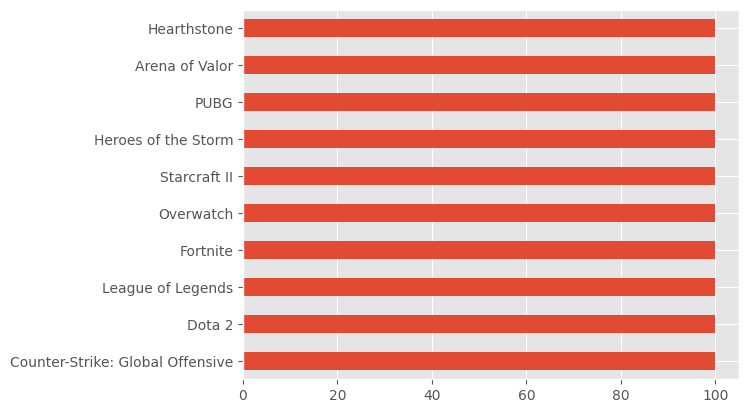

In [7]:
players['Game'].value_counts().plot(kind='barh')
plt.show()

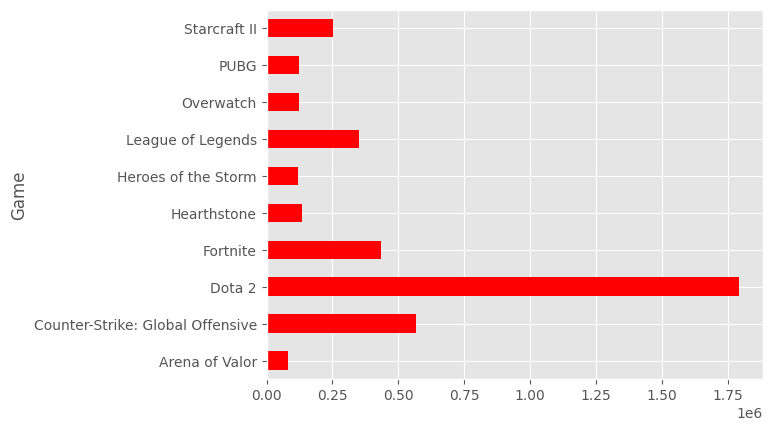

In [8]:
players.groupby(['Game']).mean()['TotalUSDPrize'].plot(kind='barh', color='red')
plt.show()

In [9]:
teams.head(10)

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.00,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.50,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.50,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.50,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.00,6,Overwatch,First-Person Shooter
5,856,Vancouver Titans,950000.00,4,Overwatch,First-Person Shooter
6,769,Shanghai Dragons,755000.00,5,Overwatch,First-Person Shooter
7,774,Los Angeles Gladiators,709605.19,13,Overwatch,First-Person Shooter
8,861,Atlanta Reign,596098.00,9,Overwatch,First-Person Shooter
9,770,Los Angeles Valiant,535000.00,6,Overwatch,First-Person Shooter


In [10]:
teams.shape

(928, 6)

In [11]:
teams['Game'].value_counts()

Overwatch                           100
Starcraft II                        100
League of Legends                   100
Fortnite                            100
Counter-Strike: Global Offensive    100
Dota 2                              100
PUBG                                100
Heroes of the Storm                 100
Hearthstone                          80
Arena of Valor                       48
Name: Game, dtype: int64

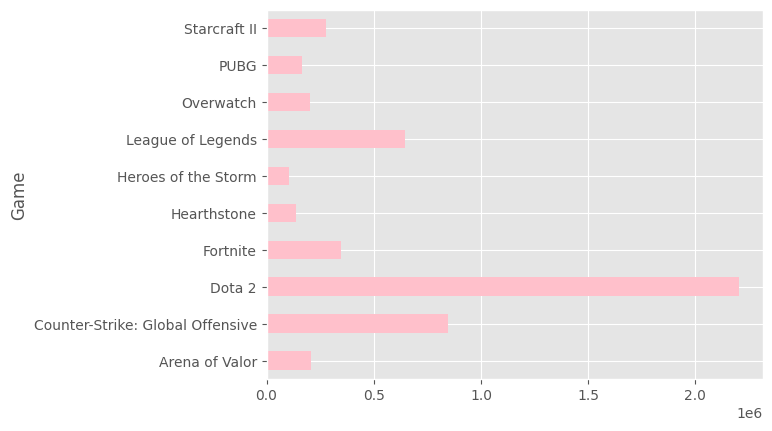

In [12]:
teams.groupby(['Game']).mean()['TotalUSDPrize'].plot(kind='barh', color='pink')
plt.show()

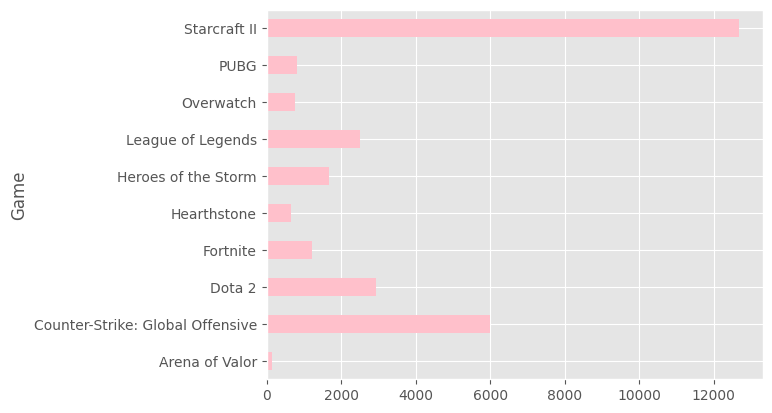

In [13]:
teams.groupby(['Game']).sum()['TotalTournaments'].plot(kind='barh', color='pink')
plt.show()

In [14]:
teams['Genre'].value_counts()

Multiplayer Online Battle Arena    348
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game               80
Name: Genre, dtype: int64

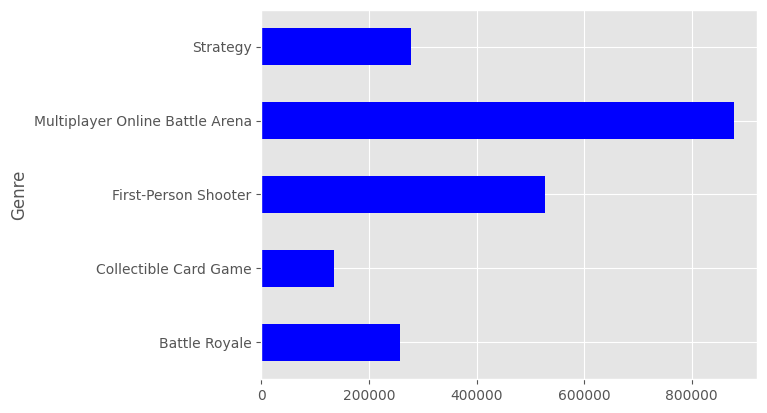

In [15]:
teams.groupby(['Genre']).mean()['TotalUSDPrize'].plot(kind='barh', color='blue')
plt.show()

In [16]:
teams['TotalTournaments'].max() 

808

<AxesSubplot:ylabel='TotalTournaments'>

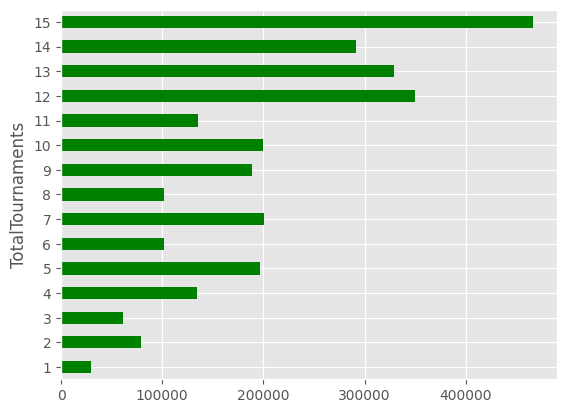

In [17]:
teams.query('TotalTournaments <= 15').groupby(['TotalTournaments']).mean()['TotalUSDPrize'].plot(kind='barh', color='green')

In [18]:
codes.head(10)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
5,Europe,EU,"Andorra, Principality of",AD,AND,20.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0


In [19]:
codes['Continent_Name'].value_counts()

Asia             58
Africa           58
Europe           57
North America    43
Oceania          27
South America    14
Antarctica        5
Name: Continent_Name, dtype: int64

In [20]:
hist = pd.read_csv(files[4], parse_dates=[0])
general = pd.read_csv(files[1])

In [21]:
hist['Year'] = hist['Date'].dt.year

hist.head()

,Date,Game,Earnings,Players,Tournaments,Year
0,1998-01-01,QuakeWorld,15000.0,8,1,1998
1,1998-05-01,Quake II,14600.0,4,1,1998
2,1998-05-01,QuakeWorld,300.0,3,1,1998
3,1998-07-01,Quake II,15000.0,5,1,1998
4,1998-07-01,QuakeWorld,6500.0,4,1,1998


In [22]:
hist.dtypes

Date           datetime64[ns]
Game                   object
Earnings              float64
Players                 int64
Tournaments             int64
Year                    int64
dtype: object

In [23]:
top_10_games = hist.groupby('Game')['Earnings'].sum().sort_values(ascending=False).index[:10]

top_10_games

Index(['Dota 2', 'Fortnite', 'Counter-Strike: Global Offensive',
       'League of Legends', 'Arena of Valor',
       'PLAYERUNKNOWN'S BATTLEGROUNDS Mobile', 'PLAYERUNKNOWN’S BATTLEGROUNDS',
       'StarCraft II', 'Overwatch', 'Rainbow Six Siege'],
      dtype='object', name='Game')

In [24]:
hist = hist.set_index(['Date'])

In [25]:
pal = sns.color_palette()

pal

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

In [26]:
hist['Year'] = hist['Year'].astype('int')

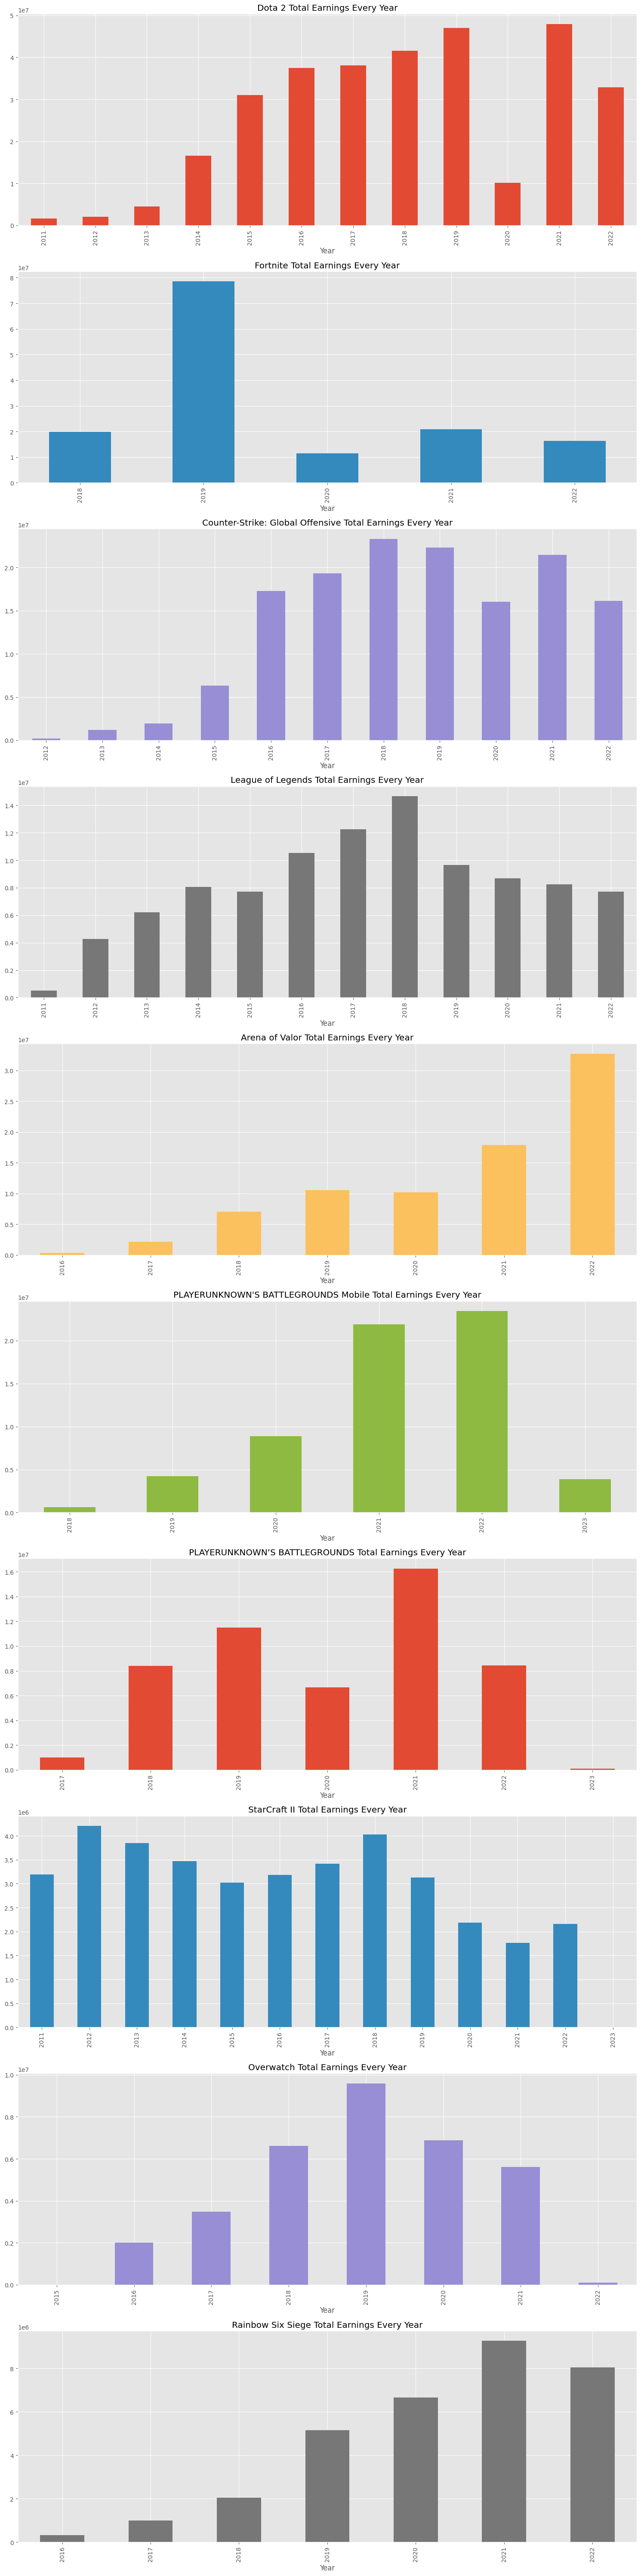

In [27]:
fig, axs = plt.subplots(10, 1, sharex=False, figsize=(15, 60))

for i, game in enumerate(top_10_games):

    hist.loc[hist['Game'] == game].query('Year > 2010').sort_values('Date').groupby('Year')['Earnings'].sum().plot(ax=axs[i],
                                                                                                                   title=f'{game} Total Earnings Every Year',
                                                                                                                   color=pal[i%6],
                                                                                                                   # ylim=(0, 85_000_000),
                                                                                                                   kind='bar')
plt.tight_layout()
plt.show()

In [28]:
hist = pd.read_csv(files[4], parse_dates=[0])

hist['Year'] = hist['Date'].dt.year

In [29]:
hist.head(10)

,Date,Game,Earnings,Players,Tournaments,Year
0,1998-01-01,QuakeWorld,15000.0,8,1,1998
1,1998-05-01,Quake II,14600.0,4,1,1998
2,1998-05-01,QuakeWorld,300.0,3,1,1998
3,1998-07-01,Quake II,15000.0,5,1,1998
4,1998-07-01,QuakeWorld,6500.0,4,1,1998
5,1998-11-01,Quake II,36600.0,13,2,1998
6,1998-11-01,QuakeWorld,22000.0,0,1,1998
7,1998-11-01,StarCraft: Brood War,20000.0,8,1,1998
8,1998-12-01,Age of Empires,2000.0,1,1,1998
9,1999-03-01,Quake II,15000.0,5,1,1999


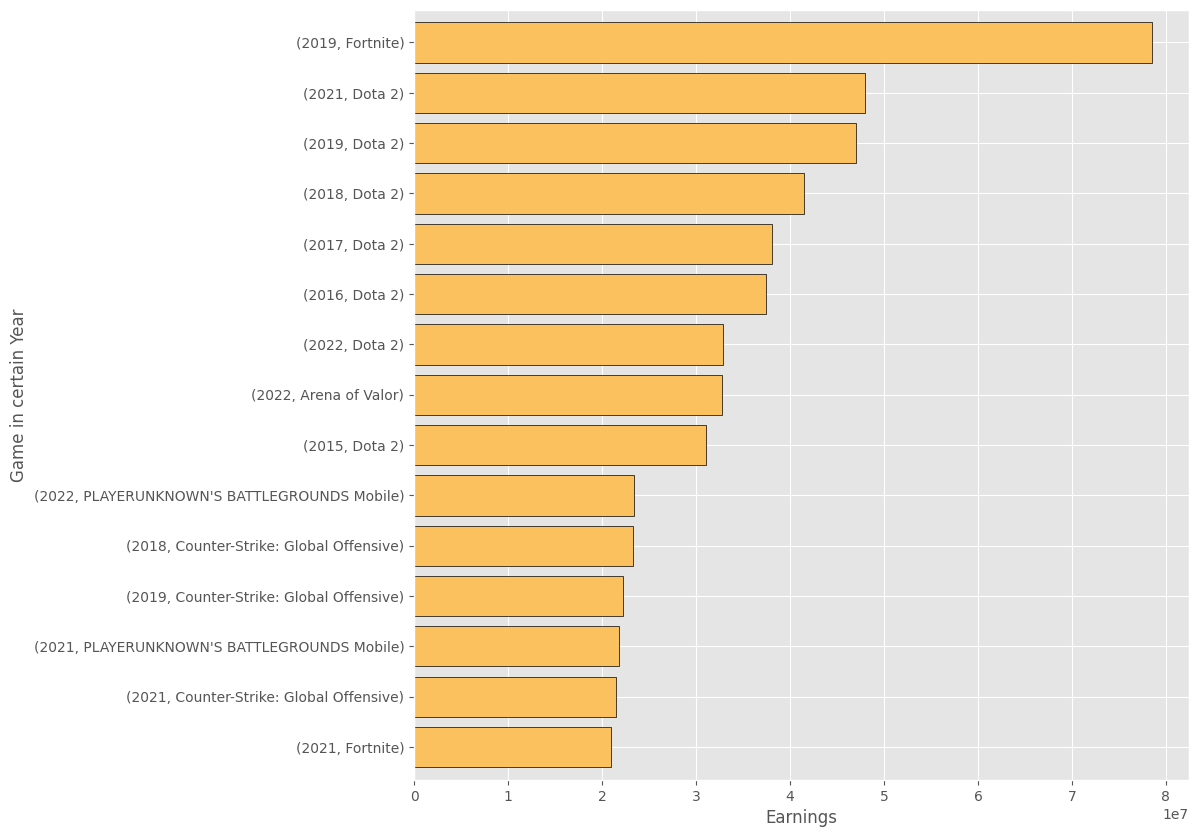

In [30]:
hist.groupby(['Year', 'Game'])['Earnings'].sum().sort_values(ascending=False).head(15).sort_values().plot(kind='barh',
                                                                                                          figsize=(10, 10),
                                                                                                          color=pal[4],
                                                                                                          width=0.8,
                                                                                                          edgecolor='black')

plt.ylabel('Game in certain Year')
plt.xlabel('Earnings')

plt.show()

In [31]:
year_earnings = hist.groupby(['Game', 'Year'])['Earnings'].sum()

year_earnings = year_earnings.reset_index()

year_earnings.head(10)

,Game,Year,Earnings
0,ARMS,2017,3392.10
1,ARMS,2018,13327.14
2,ARMS,2019,2470.86
3,ARMS,2020,1619.86
4,ARMS,2021,1146.50
5,ARMS,2022,200.00
6,Acceleration of SUGURI 2,2019,210.00
7,Acceleration of SUGURI 2,2020,100.00
8,Acceleration of SUGURI 2,2021,100.00
9,Age of Empires,1998,2000.00


In [32]:
year_earnings['Earnings_log'] = year_earnings['Earnings'].apply(np.log1p)

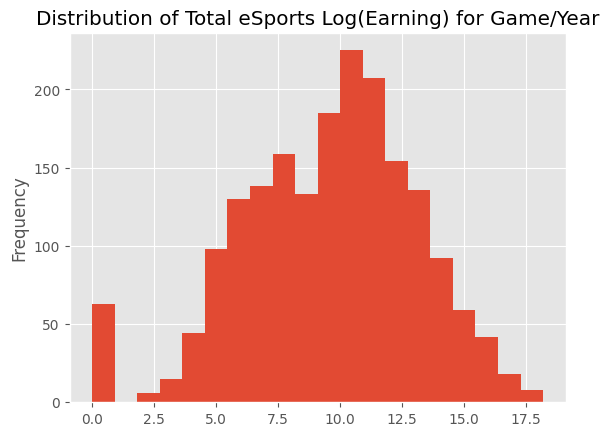

In [33]:
year_earnings['Earnings_log'].plot(kind='hist',
                                   bins=20,
                                   title='Distribution of Total eSports Log(Earning) for Game/Year')

plt.show()

In [34]:
df_plot = hist.groupby(['Year', 'Game'])['Earnings'].sum().sort_values(ascending=False).head(15).sort_values().reset_index()

In [35]:
df_plot.head(10)

,Year,Game,Earnings
0,2021,Fortnite,20914148.30
1,2021,Counter-Strike: Global Offensive,21448590.39
2,2021,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,21859871.03
3,2019,Counter-Strike: Global Offensive,22272074.29
4,2018,Counter-Strike: Global Offensive,23304491.14
5,2022,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,23418266.79
6,2015,Dota 2,31050786.86
7,2022,Arena of Valor,32730758.73
8,2022,Dota 2,32845943.52
9,2016,Dota 2,37464419.92


In [36]:
df_plot['Game_Year'] = df_plot['Game'].replace(
    'Counter-Strike: Global Offensive', 'CS:GO').replace("PLAYERUNKNOWN'S BATTLEGROUNDS Mobile", 'PUBM') + ' (' + df_plot['Year'].astype('str') + ')'

In [37]:
df_plot['Game_Year'].value_counts()

Fortnite (2021)          1
CS:GO (2021)             1
PUBM (2021)              1
CS:GO (2019)             1
CS:GO (2018)             1
PUBM (2022)              1
Dota 2 (2015)            1
Arena of Valor (2022)    1
Dota 2 (2022)            1
Dota 2 (2016)            1
Dota 2 (2017)            1
Dota 2 (2018)            1
Dota 2 (2019)            1
Dota 2 (2021)            1
Fortnite (2019)          1
Name: Game_Year, dtype: int64

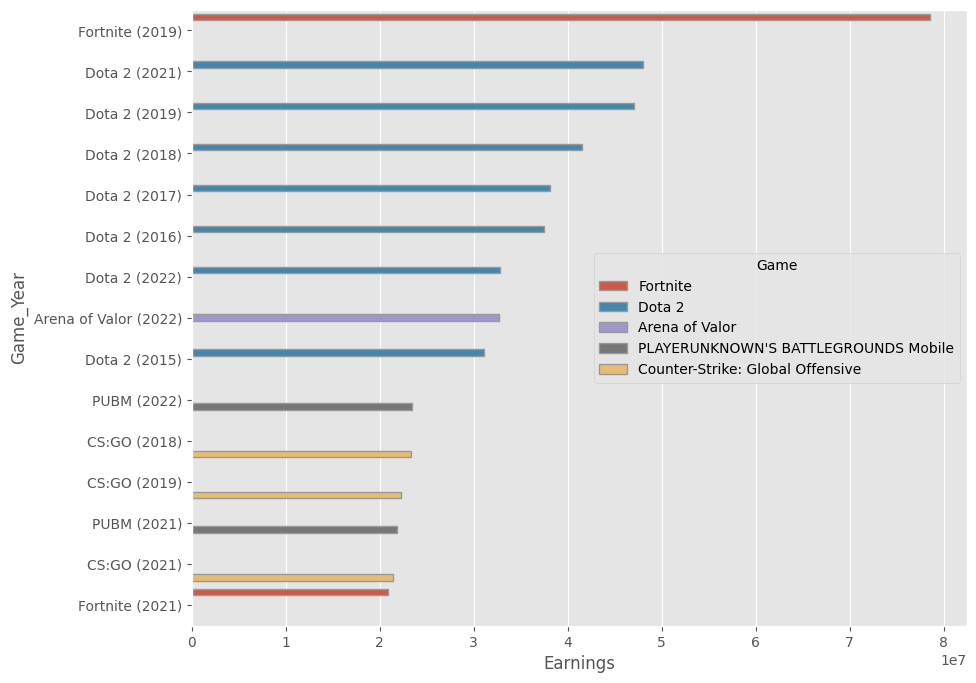

In [38]:
plt.subplots(figsize=(10, 8))

sns.barplot(data=df_plot.sort_values('Earnings', ascending=False),
            y='Game_Year', x='Earnings', hue='Game', capsize=1, errcolor=".6",
            linewidth=1, edgecolor=".6")

plt.show()